In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)
pd.set_option("display.max.columns", None)
df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


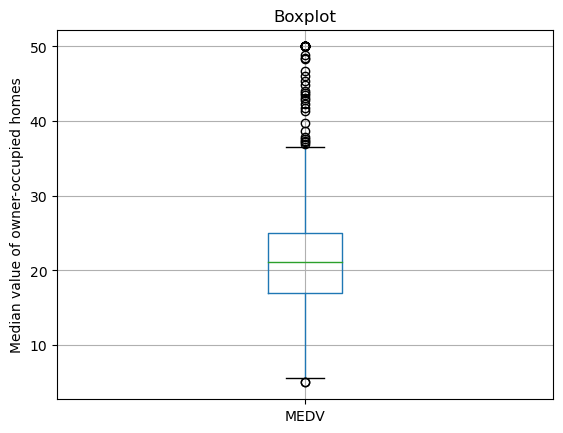

In [3]:
pd.plotting.boxplot(df, column=['MEDV'])
plt.ylabel("Median value of owner-occupied homes")

plt.title("Boxplot")
plt.show()

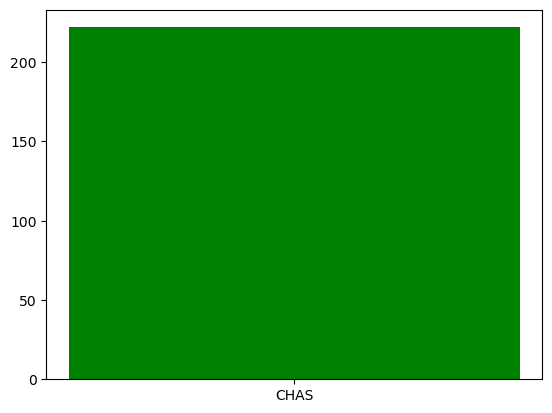

In [4]:
X = ["CHAS"]
Y = list(df.iloc[5])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.show()

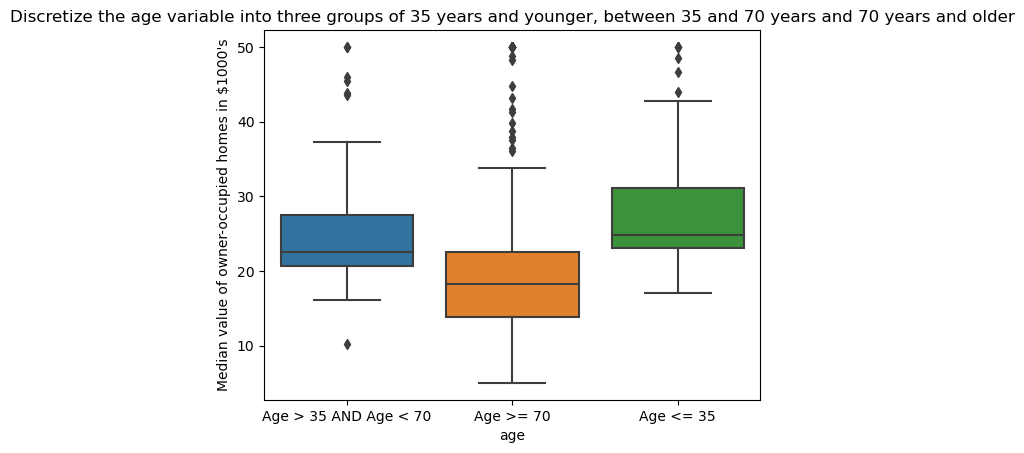

In [10]:
df.loc[(df["AGE"] <= 35), 'age'] = 'Age <= 35'
df.loc[(df["AGE"] >= 70), 'age'] = 'Age >= 70'
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70), 'age'] = 'Age > 35 AND Age < 70'
ax = sns.boxplot(x='age', y='MEDV', data=df)
plt.title("Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older")
plt.ylabel("Median value of owner-occupied homes in $1000's");
plt.show()